# **Presentation by J.P. More-Gain**
## We have four strategies for you to invest in SPY
1. HODL - Buy-and-hold the SPY exchange-traded fund (ETF)
2. INTRADAY - Hold SPY intraday only (i.e., buy at open and sell at close)
3. OVERNIGHT - Hold SPY overnight only (i.e., buy at close and sell at open)
4. TRIMMING - Buy-and-hold SPY except for worst 3 days and best 3 days each year

In [109]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import yfinance as yf 
import seaborn as sns
import datetime
import calendar
import pandas_datareader as pdr

plt.style.use('default')
plt.rcParams['figure.dpi'] = 300

In [110]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

In [111]:
pdr.famafrench.get_available_datasets()[:5]

ff_all = pdr.DataReader(name= 'F-F_Research_Data_Factors_daily',data_source= 'famafrench',start='1993-02-01')

/var/folders/xw/lw701x990w3b7kp14322tvyh0000gn/T/ipykernel_74836/2047473843.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_all = pdr.DataReader(name= 'F-F_Research_Data_Factors_daily',data_source= 'famafrench',start='1993-02-01')


In [112]:
RiskFreeRate = pd.DataFrame.from_dict(ff_all[0]['RF']).div(252)
SPY = yf.download(tickers ='SPY',end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


# To determine the most suitable investment strategy for you, consider the following factors:

1. Initial Investment ($10,000): We use a $10,000 baseline for comparison across different strategies.
2. Reward: This measures the return on your investment, expressed as the percentage CAGR of the portfolio. 
3. Risk: Assessed as the volatility of the investment, indicating the potential for financial loss.
4. Sharpe Ratio (Reward to Risk): A metric comparing the return of an investment to its risk. Higher values suggest better risk-adjusted returns.
5. Value at Risk (VaR): Estimates the maximum potential loss in your investment over a specific time frame, helping gauge the likelihood of substantial losses.
6. Win Loss Ratio: This ratio compares the number of winning trades to losing trades.
7. Risk Reward Ratio: This ratio compares the potential risk involved with a trade to the potential reward.

# In our analysis, we have utilized the following formulas :


$$ \text{CAGR} = \left( \frac{\text{Ending Value}}{\text{Beginning Value}} \right) ^{\frac{1}{30}} - 1 $$

<br>

$$ \text{Sharpe Ratio} = \frac{\text{Mean Excess Return} \times 252}{\text{Standard Deviation of Excess Return} \times \sqrt{252}} $$

<br>


$$ \text{Annualized Volatility} = \text{Daily Standard Deviation} \times \sqrt{252} $$

<br>

$$ \text{VaR} = -\text{Percentile}(\text{Returns}, \text{Confidence Level} \times 100) $$

<br>

$$ \text{Win Loss Ratio} = \frac{\sum(\text{Returns} > 0)}{\sum(\text{Returns} < 0)} $$

<br>

$$ \text{Risk Reward Ratio} = \frac{\text{Average Earnings}}{-\text{Average Losses}} $$





In [113]:
# Functions Used

def sharpe_ratio(returns, riskfree_rate):
    returns.index = pd.to_datetime(returns.index)
    riskfree_rate.index = pd.to_datetime(riskfree_rate.index)
    aligned_returns, aligned_riskfree_rate = returns.align(riskfree_rate, join='inner', axis=0)
    excess_returns = aligned_returns.sub(aligned_riskfree_rate['RF'], axis=0)
    mean_excess_return = excess_returns.mean()
    std_excess_return = excess_returns.std()

    sharpe = (mean_excess_return * 252) / (std_excess_return * np.sqrt(252))
    return sharpe

def volatility(returns, trading_days = 252):
    daily_std_dev = returns.std(ddof=1)
    annualized_volatility = daily_std_dev * np.sqrt(trading_days)
    return annualized_volatility

def var(returns, confidence_level = 0.05):
    var = np.percentile(returns.dropna(), confidence_level * 100)
    return abs(var)

# **HODL - Buy-and-hold the SPY exchange-traded fund (ETF)**

1. This strategy offers simplicity and ease of execution, requiring minimal time and effort for implementation.

2. It provides significant compound growth potential with a robust CAGR of 10.31%.

3. The strategy entails low transaction costs and tax efficiency due to minimal trading activity.

4. It provides stable cashflows in terms of dividend to investors who prefer recurring cashflows.

5. The strategy's lack of flexibility may result in missed opportunities to adjust to changing market conditions.

In [114]:
SPY_Returns = pd.DataFrame(SPY['Adj Close'].pct_change(1).dropna())

returns_1 = (SPY_Returns
    .dropna()
    .add(1)
    .cumprod()
    .mul(10000)
)
returns_1.columns = ['Value ($)']
returns_1.iloc[-1]

strategy_1_sharpe = sharpe_ratio(SPY_Returns, RiskFreeRate)
strategy_1_volatility = volatility(SPY_Returns)
strategy_1_CAGR = (returns_1.iloc[-1] / returns_1.iloc[0]) ** (1 / (30)) - 1
strategy_1_VAR = var(SPY_Returns)

strategy_3_WL_Ratio = sum(SPY_Returns['Adj Close']>0) / sum(SPY_Returns['Adj Close']<0)

average_earnings = SPY_Returns[SPY_Returns > 0].mean()
average_losses = SPY_Returns[SPY_Returns < 0].mean()

risk_reward_ratio = average_earnings / -average_losses

# print(f"Ending Value: ${returns_1.iloc[-1].item():,.4f}")
# print(f"CAGR: {strategy_1_CAGR.item():,.4f}")
# print(f"Volatility: {strategy_1_volatility.item():,.4f}")
# print(f"Sharpe Ratio: {strategy_1_sharpe.item():,.4f}")
# print(f"Value at Risk: {strategy_1_VAR.item():,.4f}")

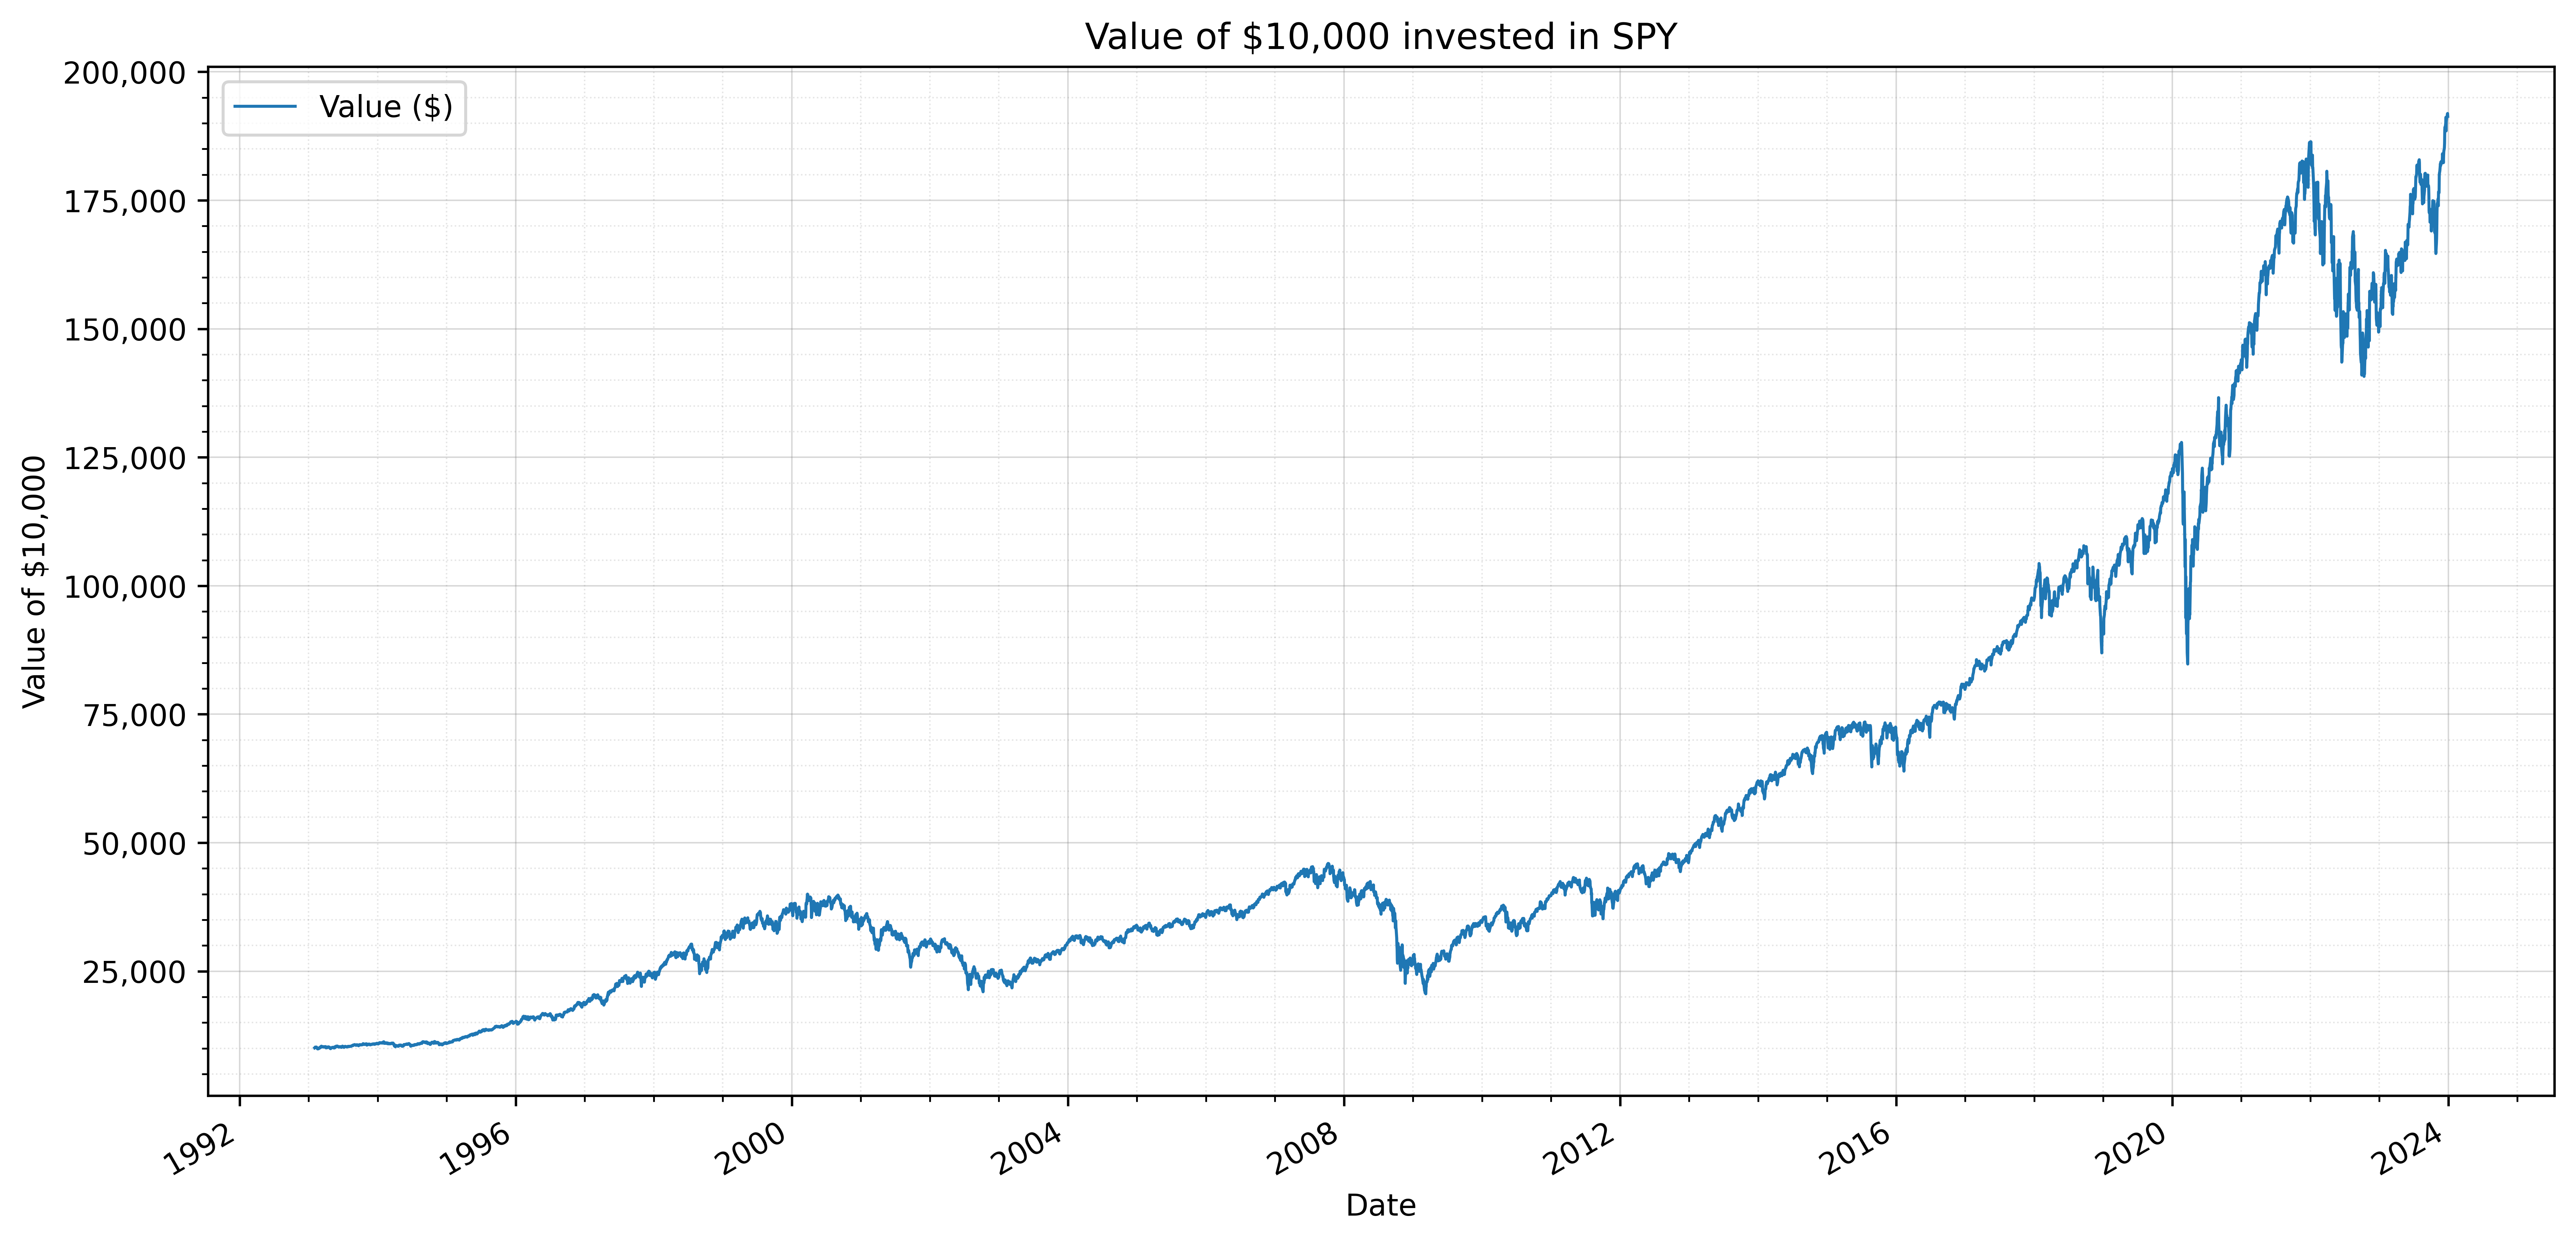

In [115]:
returns_1.plot(linewidth=1, figsize=[14,7])
plt.minorticks_on()

plt.title('Value of $10,000 invested in SPY')
plt.ylabel('Value of $10,000')
plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.3)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.2)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# **INTRADAY - Hold SPY intraday only (i.e., buy at open and sell at close)**

1. As the invested capital is converted to cash at the close, the investor's capital is in a liquid state. 

2. While investors are exposed to increased intraday volatility, this also presents opportunities for taking advantage of short-term positive price fluctuations

3. The strategy minimizes overnight market exposure, reducing the impact of overnight news or events.

4. It incurs frequent trading fees and potentially higher taxes due to short-term capital gains.

5. It may limit potential gains by selling at the market close, missing out on potential overnight gains.


*Interesting Observation -*

*Upon close observation of the data, since March 2009, the strategy has been performing consistently well and has shown a return of approximately 164%.*


In [116]:
startegy_2 = pd.DataFrame((SPY['Close'] - SPY ['Open']) / SPY ['Open'])
# startegy_2 = startegy_2.loc['2009-03-02':'2023-12-31']
startegy_2.columns = ['Value ($)']

returns_2 = (startegy_2.add(1).cumprod().mul(10000))

strategy_2_sharpe = sharpe_ratio(startegy_2, RiskFreeRate)
strategy_2_volatility = volatility(startegy_2)
strategy_2_CAGR = (startegy_2.iloc[-1] / startegy_2.iloc[0]) ** (1 / (30)) - 1
strategy_2_VAR = var(startegy_2)

strategy_2_WL_Ratio = sum(startegy_2['Value ($)']>0) / sum(startegy_2['Value ($)']<0)

average_earnings = startegy_2[startegy_2 > 0].mean()
average_losses = startegy_2[startegy_2 < 0].mean()

risk_reward_ratio = average_earnings / -average_losses

# print("Risk-Reward Ratio:", risk_reward_ratio)
# print("WL:", strategy_2_WL_Ratio)
# print(f"Ending Value of Portfolio: ${returns_2.iloc[-1].item():,.4f}")
# print(f"CAGR: {strategy_2_CAGR.item():.4%}")
# print(f"Volatility: {strategy_2_volatility.item():.4f}")
# print(f"Sharpe Ratio: {strategy_2_sharpe.item():.4f}")
# print(f"Value at Risk: {strategy_2_VAR:.4f}")

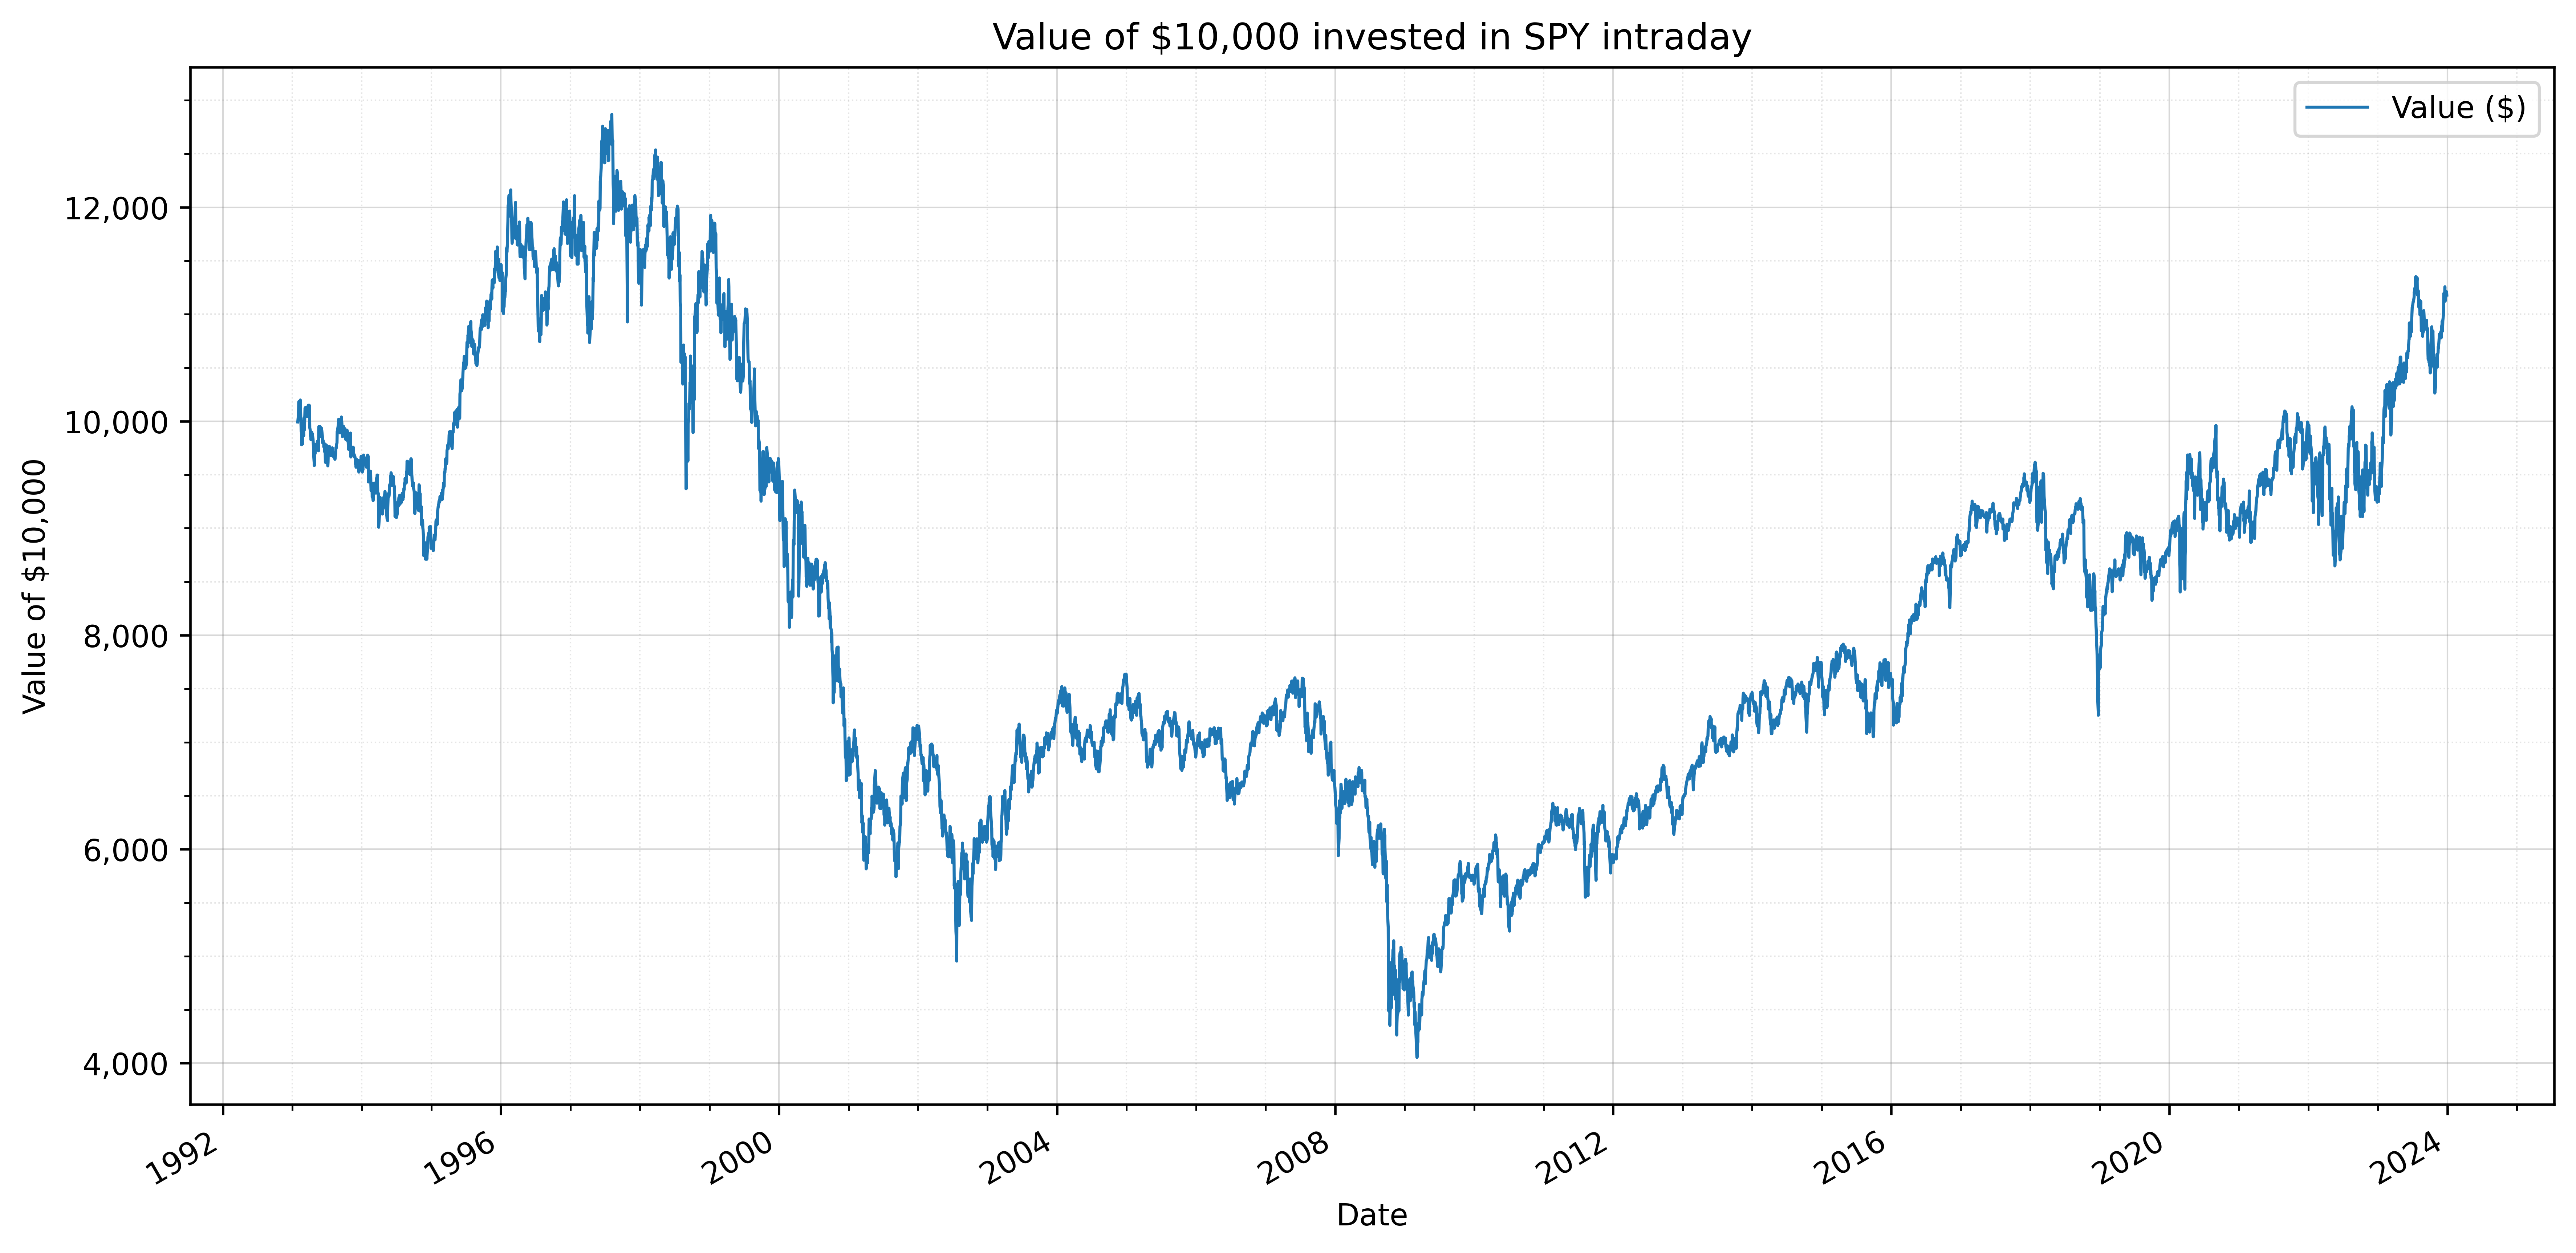

In [117]:
returns_2.plot(linewidth=1, label='SPY Intraday Returns', figsize=[14,7])
plt.minorticks_on()
plt.title('Value of $10,000 invested in SPY intraday')
plt.ylabel('Value of $10,000')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.3)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.2)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend()
plt.show()

# **OVERNIGHT - Hold SPY overnight only (i.e., buy at close and sell at open)**

1. This strategy benefits from overnight market movements, potentially capturing overnight gains while minimizing intraday volatility.

2. It offers the opportunity for investors to participate in extended market hours without the need for constant monitoring during the trading day.

3. However, it exposes investors to overnight risks, including gap-downs or gap-ups, which can result in significant losses.

4. It incurs frequent trading fees and potentially higher taxes due to short-term capital gains.

5. This strategy's reliance on overnight movements may result in missed intraday opportunities. 


In [118]:
Open = np.array(SPY['Open'])
Close = np.array(SPY['Close'])

def returns(Open_1,Close_1):
    return((Open_1[1:] - Close_1[:-1]) / Close_1[:-1])

strategy_3 = pd.DataFrame(returns(Open, Close), columns=['Returns']).dropna()

strategy_3.index = SPY.index[1:]

returns_3 = (strategy_3
    .add(1)
    .cumprod()
    .mul(10000)
)

returns_3.columns = ['Value ($)']
returns_3.index = SPY.index[1:]

strategy_3_sharpe = sharpe_ratio(strategy_3['Returns'], RiskFreeRate)
strategy_3_volatility = volatility(strategy_3['Returns'])
strategy_3_VAR = var(strategy_3)

days = (strategy_3.index[-1] - strategy_3.index[0]).days

strategy_3_CAGR = (returns_3.iloc[-1] / returns_3.iloc[0]) ** (1 / 30) - 1

strategy_3_WL_Ratio = sum(strategy_3['Returns']>0) / sum(strategy_3['Returns']<0)

average_earnings = strategy_3[strategy_3 > 0].mean()
average_losses = strategy_3[strategy_3 < 0].mean()

risk_reward_ratio = average_earnings / -average_losses

# print(f"Ending Value of Portfolio: ${returns_3.iloc[-1].item():,.4f}")
# print(f"CAGR: {strategy_3_CAGR.item():.4%}")
# print(f"Volatility: {strategy_3_volatility.item():.4f}")
# print(f"Sharpe Ratio: {strategy_3_sharpe.item():.4f}")
# print(f"Value at Risk: {strategy_3_VAR:.4f}")

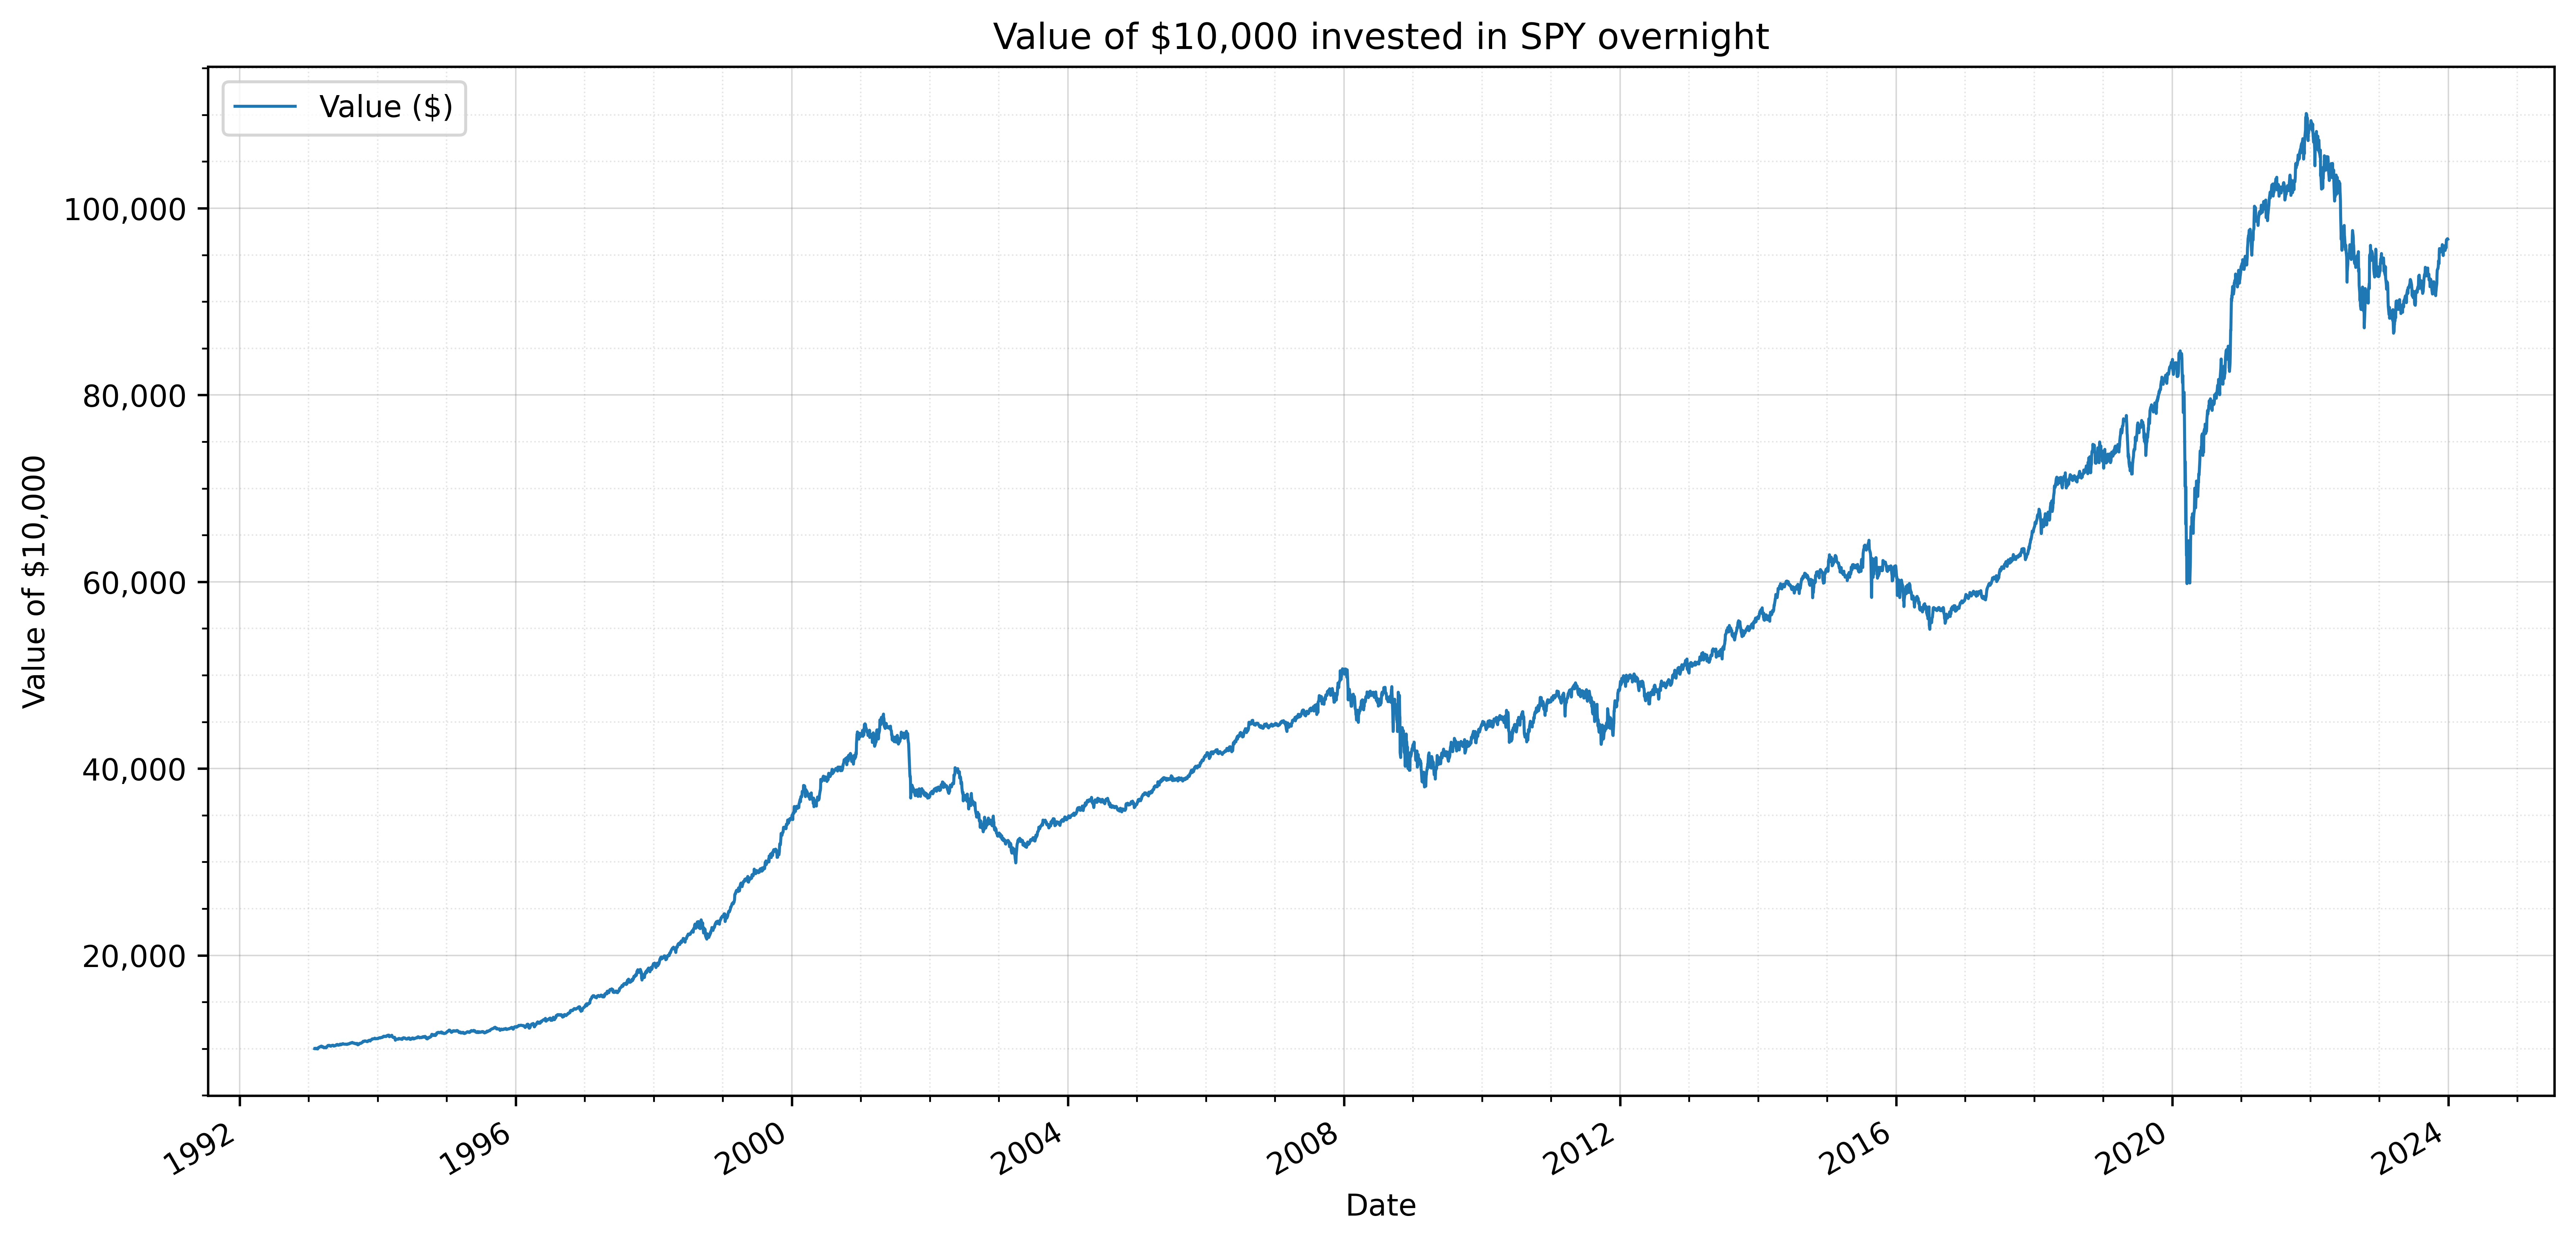

In [119]:
returns_3.plot(linewidth=1, label='SPY Overnight Returns', figsize=[14,7])
plt.minorticks_on()
plt.title('Value of $10,000 invested in SPY overnight')
plt.ylabel('Value of $10,000')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.3)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.2)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend()
plt.show()

# **TRIMMING - Buy-and-hold SPY except for worst 3 days and best 3 days each year**
1. This strategy aims to eliminate the impact of extreme market movements by excluding the worst and best days each year, reducing portfolio volatility.

2. This strategy requires predicting the worst and best days, which is not possible in the real world. 

3. Compared to other strategies like intraday or overnight trading, trimming SPY eliminates the need for active monitoring and frequent trading, reducing transaction costs and tax implications.

4. The reason this strategy gives the best returns compared to the other three, is because the percentage absolute change on worst days is greater than the best days. 


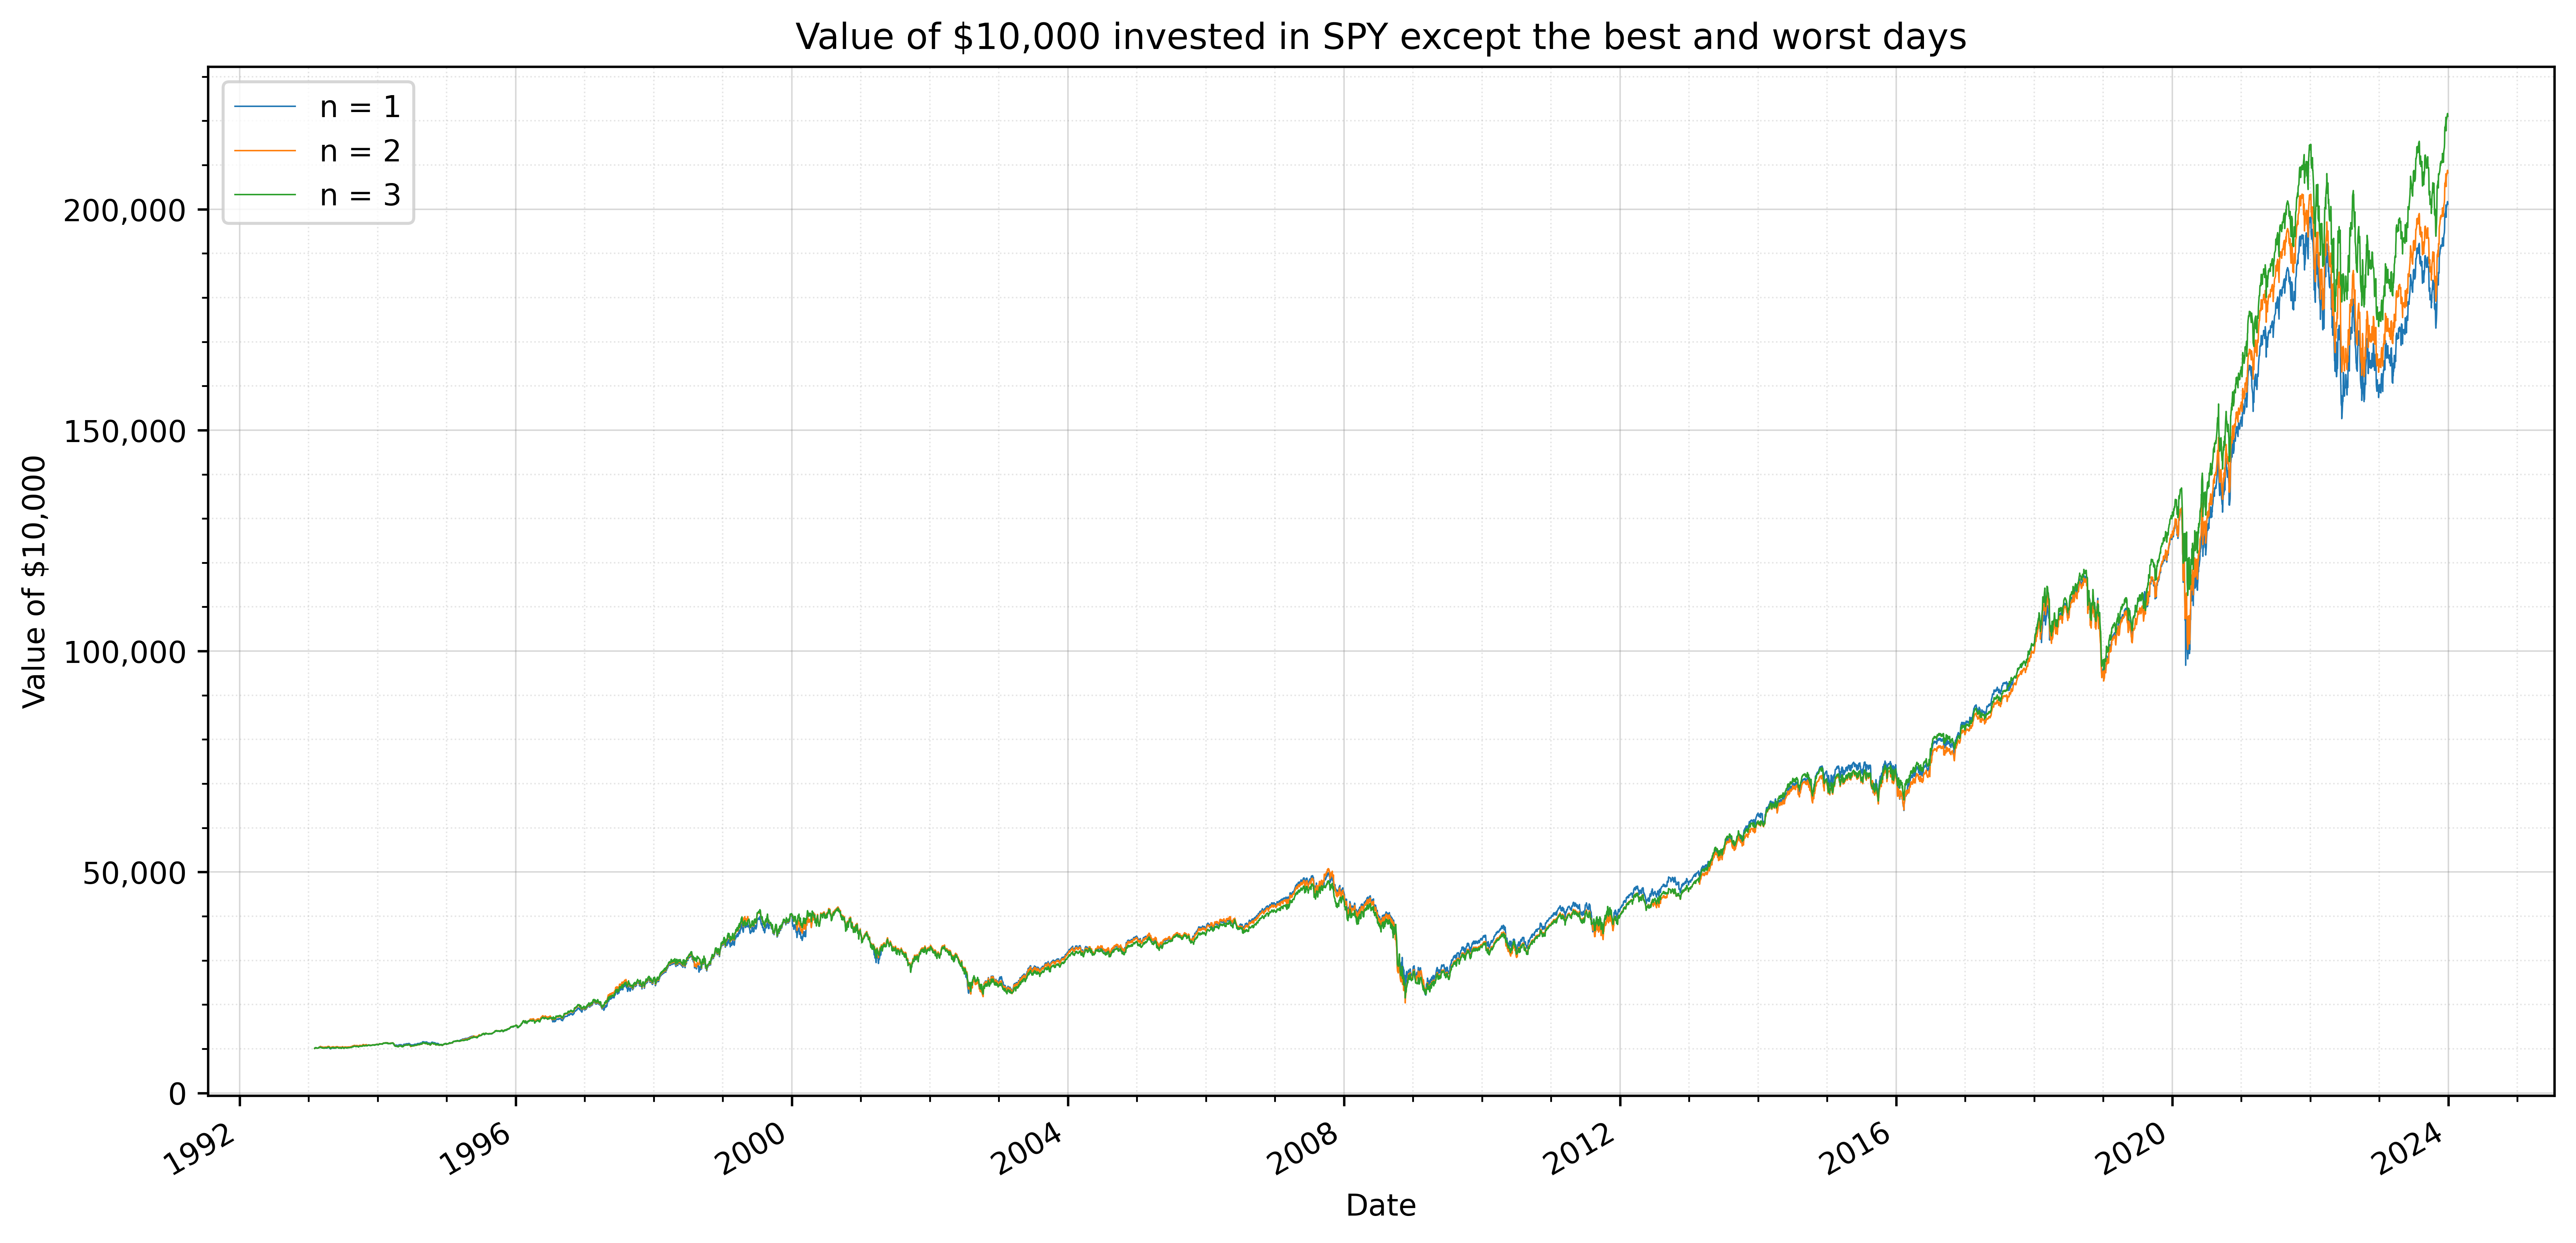

In [120]:
returns_4a = (pd.DataFrame(SPY['Adj Close'].pct_change())).dropna()
returns_4a.columns = ['Daily Returns']
rows_list = []

returns_4a = (pd.DataFrame(SPY['Adj Close'].pct_change().add(1))).dropna()
returns_4a.columns = ['Daily Returns']


def n_days(returns_df, n):
    rows_list = []

    for year, group in returns_df.groupby(returns_df.index.year):
        sorted_group = group.sort_values(by='Daily Returns', ascending=False)
        
        max_n = sorted_group.head(n)
        min_n = sorted_group.tail(n)

        for date in max_n.index:
            rows_list.append({'Date': date, 'Return': max_n.loc[date, 'Daily Returns']})
        for date in min_n.index:
            rows_list.append({'Date': date, 'Return': min_n.loc[date, 'Daily Returns']})
    
    min_max = pd.DataFrame(rows_list)
    filtered_returns = returns_df[~returns_df.index.isin(min_max['Date'])].dropna()
    returns_4 = filtered_returns.cumprod().mul(10000)
    returns_4.columns = [f'n = {n}']

    return returns_4

fig, ax = plt.subplots(figsize=[14, 7])

for n in [1, 2, 3]:
    result = n_days(returns_4a, n)
    result.plot(ax=ax, linewidth=0.5, label=f'n = {n}')
    strategy_4_returns = result.pct_change().dropna()
    strategy_4_returns.columns = ['Daily Returns']

    strategy_4_sharpe = sharpe_ratio(strategy_4_returns.iloc[:,0], RiskFreeRate)
    strategy_4_volatility = volatility(strategy_4_returns.iloc[:,0])
    strategy_4_VAR = var(strategy_4_returns.iloc[:,0])
    
    days = (strategy_4_returns.index[-1] - strategy_4_returns.index[0]).days

    strategy_4_CAGR = (result.iloc[-1] / result.iloc[0]) ** (1 / 30) - 1
    
    strategy_4_WL_Ratio = sum(strategy_4_returns['Daily Returns']>0) / sum(strategy_4_returns['Daily Returns']<0)

    average_earnings = strategy_4_returns[strategy_4_returns > 0].mean()
    average_losses = strategy_4_returns[strategy_4_returns < 0].mean()

    risk_reward_ratio_4 = average_earnings / -average_losses

    # print(f"Strategy 4, n = {n} : Starting Value of Portfolio: $10,000")
    # print(f"Strategy 4, n = {n} : Ending Value of Portfolio: ${result.iloc[-1].item():,.4f}")
    # print(f"Strategy 4, n = {n} : Sharpe Ratio: {strategy_4_sharpe.item():.4f}")
    # print(f"Strategy 4, n = {n} : Volatility: {strategy_4_volatility.item():.4f}")
    # print(f"Strategy 4, n = {n} : CAGR: {strategy_4_CAGR.item():.4%}")  # Assuming you have a strategy_4_CAGR variable
    # print(f"Strategy 4, n = {n} : Value at Risk: {strategy_4_VAR}")
    # print('-' * 60)


plt.minorticks_on()
plt.title('Value of $10,000 invested in SPY except the best and worst days')
plt.ylabel('Value of $10,000')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.3)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.2)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend()
plt.show()

# Statistics for TRIMMING

 - We observe that eliminating a greater number of the best and worst days results in better returns and lower risk.

| Metric                     | n = 1         | n = 2         | n = 3         |
|----------------------------|---------------|---------------|---------------|
| Ending Value of Portfolio  | $201,147.36   | $208,214.70   | $221,024.03   |
| CAGR                       | 10.4963%      | 10.6236%      | 10.8440%      |
| Volatility                 | 17.61%        | 16.80%        | 16.21%        |
| Sharpe Ratio               | 0.5919        | 0.6236        | 0.6576        |
| Value at Risk              | 0.0178        | 0.01716       | 0.0167        |


# **Cumulative Plot**

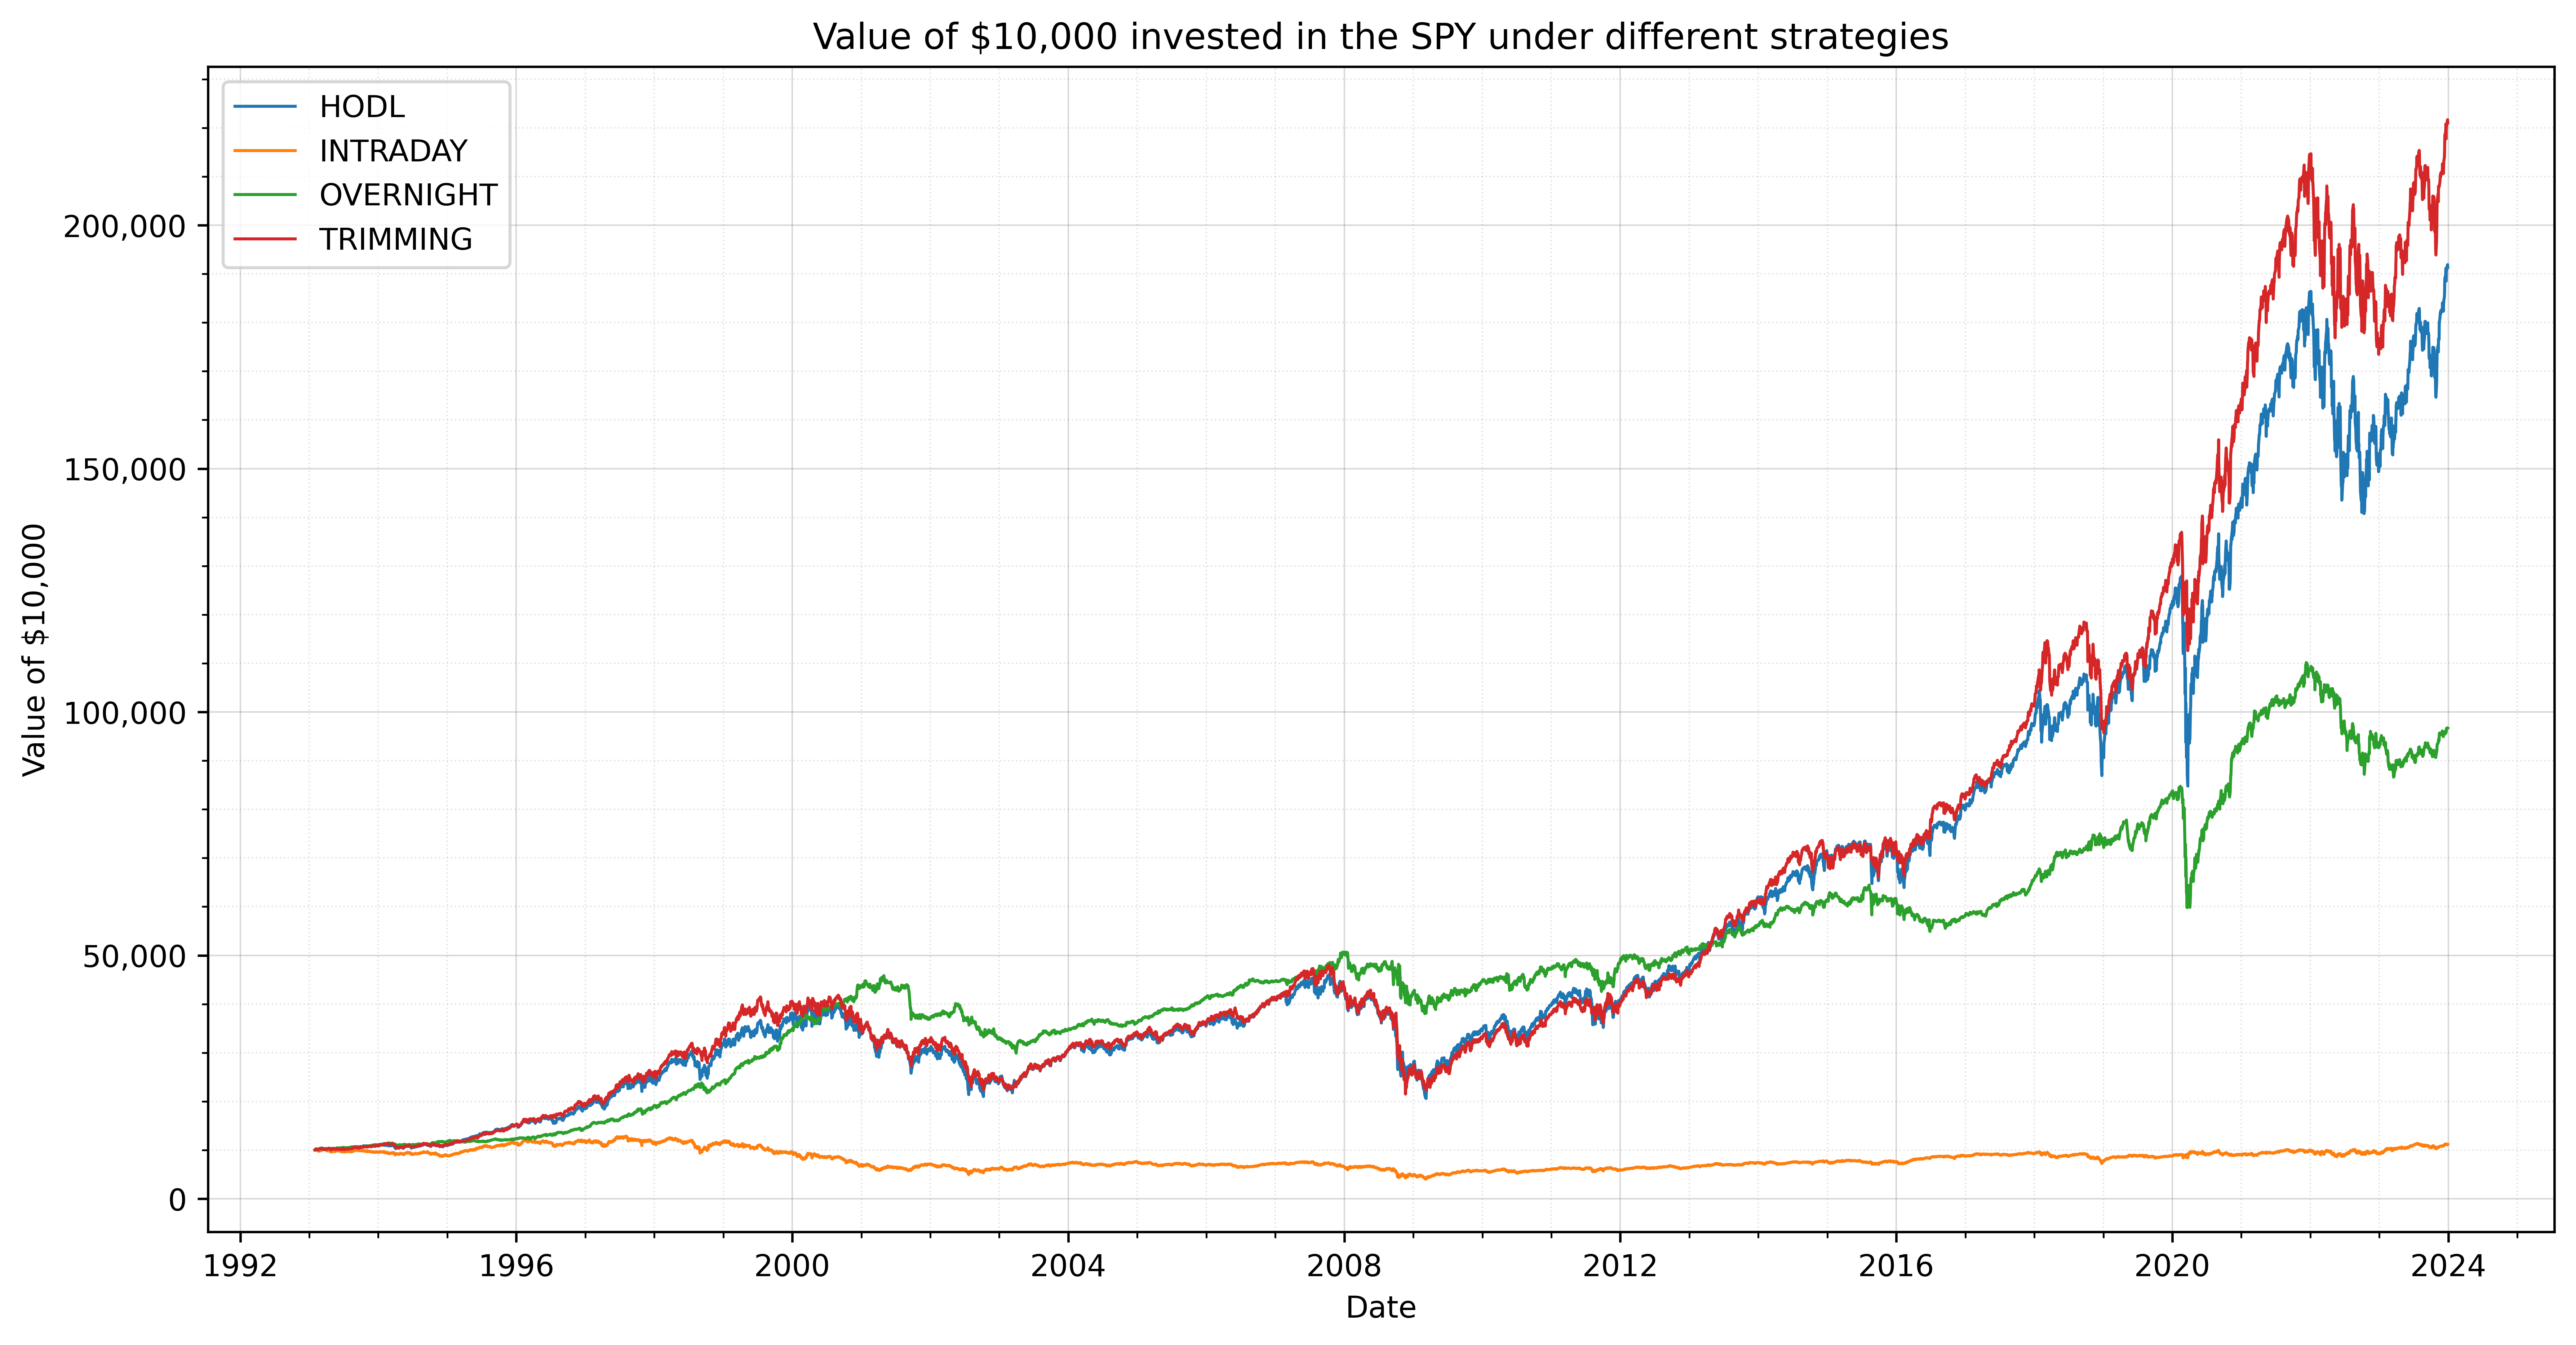

In [121]:
plt.figure(figsize=[14, 7])

plt.plot(returns_1,linewidth=1, label='HODL')
plt.plot(returns_2,linewidth=1, label='INTRADAY')
plt.plot(returns_3,linewidth=1, label='OVERNIGHT') 
plt.plot(result,linewidth=1, label='TRIMMING')

plt.minorticks_on()
plt.title('Value of $10,000 invested in the SPY under different strategies')
plt.xlabel('Date')
plt.ylabel('Value of $10,000')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.3)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.2)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend()
plt.show()

# Statistics of all strategies

| Metric                    | HODL           | INTRADAY       | OVERNIGHT      | TRIMMING (n=3) |
|---------------------------|----------------|----------------|----------------|----------------|
| Ending Value of Portfolio | $191,343.4133  | $11,179.3483   | $96,697.7442   | $221,024.0311  |
| CAGR                      | 10.31%         | 4.2487%        | 7.8542%        | 10.8440%       |
| Volatility                | 18.77%         | 15.35%         | 10.66%         | 16.21%         |
| Sharpe Ratio              | 0.5549         | 0.0416         | 0.6582         | 0.6576         |
| Value at Risk             | 1.83%          | 1.56%          | 0.94%          | 1.6678%        |
| Win Loss Ratio            | 1.18           | 1.1217         | 1.2531         | 1.1919         |
| Risk Reward Ratio         | 0.94           | 0.9052         | 0.9265         | 0.9523         |


### If we could predict the future perfectly, the "Trimming" strategy would be our top pick. But since predicting the market perfectly is not possible, we suggest the "Buy & Hold" (HODL) strategy as the best option for most investors. Because :

1. High Returns - A CAGR of 10.31% indicates a healthy, consistent rate of return compared to other strategies.
2. Sharpe Ratio - The Sharpe Ratio of 0.5549, while not the highest, is respectable, showing that the returns are reasonable when adjusted for the risk taken.
3. Simplicity HODL: The strategy is simple – buy and hold your investments, no matter the market's short-term behavior. This is easier to manage and less stressful for investors.
4. Lower Taxes - As this is a buy and hold strategy, the only tax the investor would pay is when they redeem their investments. 


The main downside of the HODL strategy is its direct exposure to market volatility.







# Histogram for Average Monthly Return
1. Historical data indicates that, on average, October, November, and December consistently yield the highest profits each year.
2. This trend lends credibility to the adage "Sell in May and Go Away."
3. Additional investigation is required to understand the reasons behind the consistently positive returns in the final quarter of each year.

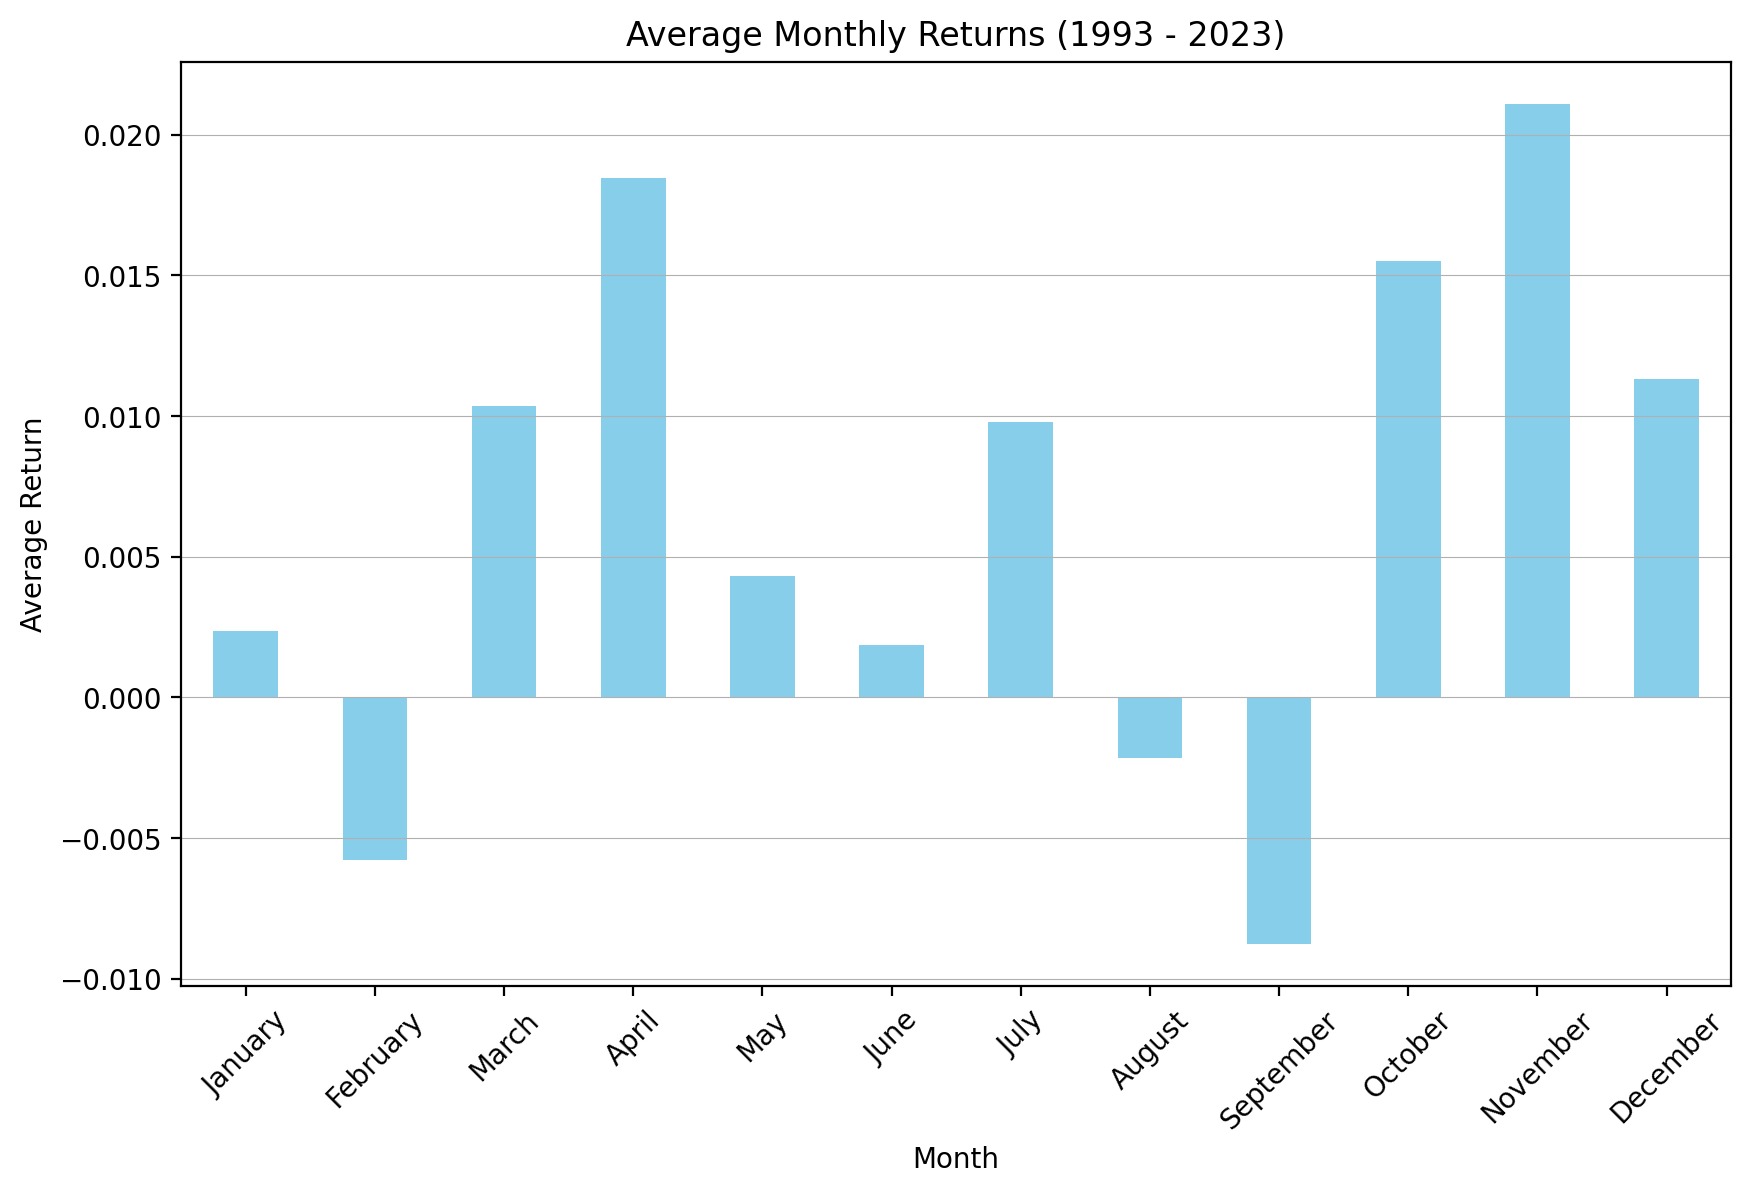

In [122]:
start_year = 1993
end_year = 2023

heatmap_data = pd.DataFrame()

all_years = SPY.index.year.unique()
years = [year for year in all_years if start_year <= year <= end_year]
months = range(1, 13)  # Months from January to December

# Loop over each year and month
for year in years:
    yearly_returns = []

    for month in months:
        monthly_data = SPY[(SPY.index.year == year) & (SPY.index.month == month)]
        
        if not monthly_data.empty:
            initial_price = monthly_data['Adj Close'].iloc[0]
            final_price = monthly_data['Adj Close'].iloc[-1]
            return_on_investment = (final_price / initial_price) - 1
            yearly_returns.append(return_on_investment)
        else:
            yearly_returns.append(np.nan)

    heatmap_data[year] = yearly_returns

# Transpose DF
heatmap_data = heatmap_data.T

average_monthly_returns = heatmap_data.mean()

plt.figure(figsize=(10, 6), dpi=100)
average_monthly_returns.plot(kind='bar', color='skyblue')
plt.title(f'Average Monthly Returns ({start_year} - {end_year})')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.grid(axis = 'y', linewidth = 0.4)
plt.xticks(range(0, 12), [calendar.month_name[i] for i in range(1, 13)], rotation=45)

plt.show()

In [123]:
new_roll = pd.DataFrame(
    {'Returns': (SPY['Adj Close'].pct_change())})

new_roll['1Y_MA'] = new_roll['Returns'].rolling(window=252 * 1).mean()
new_roll['3Y_MA'] = new_roll['Returns'].rolling(window=252 * 3).mean()
new_roll['5Y_MA'] = new_roll['Returns'].rolling(window=252 * 5).mean()

Y1_Avg_Return = new_roll['1Y_MA'].dropna().mean()*252
Y3_Avg_Return = new_roll['3Y_MA'].dropna().mean()*252 * 3
Y5_Avg_Return = new_roll['5Y_MA'].dropna().mean()*252 * 5

x = {"1 Year Average Return" : Y1_Avg_Return, "3 Year Average Return" : Y3_Avg_Return,"5 Year Average Return" : Y5_Avg_Return}

| Metric                  | Value  |
|-------------------------|--------|
| 1 Year Average Return   | 0.1113 |
| 3 Year Average Return   | 0.3417 |
| 5 Year Average Return   | 0.5392 |

The above table indicates that, on average, investing in the SPY ETF on any given day for 1 year, 3 years, and 5 years has historically yielded returns of 11.13%, 34.17%, and 53.92%, respectively.



##### All the trading strategies we have examined carry inherent market risks and might not perform as expected in the short run. However, we maintain a long-term positive outlook on the market's trajectory. We assume that past performance will persist in the future. While our calculations do not account for taxes, we have explored their potential impact on each strategy.